# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


## Feature analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import seaborn as sns
import pandas as pd

### Get Phoneme data

Download Phoneme dataset from [OpenML datasets](https://www.openml.org/search?type=data&sort=runs&status=active) using `sklearn.datasets.fetch_openml()` function. The only mandatory parameter for the fetch_openml() -function is the dataset name, 'phoneme' in this case. The function gets the data, but can complain with some warning messages. You can suppress them by giving two extra optional parameters `version=1` and `parser='auto'`. It will define which version of the dataset you want and how 

Store the result as a variable called `phoneme`.

Study the the data structure returned by the fetch. What data structures it contains. Extract the feature matrix to variable called `X` and the target to variable called `Y`. 

Find out the number of features and samples and save them to variables called `n` and `p`.

*TIP* You can find out that the phoneme data set contains several data structures, and you can think that it is a dictionary, so you can index it like a vector which strings and keys. You can list all available keys using `phoneme.keys()`

In [24]:
# YOUR CODE HERE
# FETCH THE DATASE
phoneme = sklearn.datasets.fetch_openml(name = "phoneme", version=1, parser='auto') 

# MATRIX X AND TARGET Y
X = phoneme.data
Y = phoneme.target
print(f"Type of X: {type(X)}")
print(X.head())
print(Y)

# FEATURES N AND SAMPLES P
n, p = X.shape
print(f"The dataset contains {n} samples and {p} features.")

phoneme.keys()

Type of X: <class 'pandas.core.frame.DataFrame'>
         V1        V2        V3        V4        V5
0  0.489927 -0.451528 -1.047990 -0.598693 -0.020418
1 -0.641265  0.109245  0.292130 -0.916804  0.240223
2  0.870593 -0.459862  0.578159  0.806634  0.835248
3 -0.628439 -0.316284  1.934295 -1.427099 -0.136583
4 -0.596399  0.015938  2.043206 -1.688448 -0.948127
0       1
1       1
2       1
3       1
4       1
       ..
5399    1
5400    2
5401    2
5402    1
5403    2
Name: Class, Length: 5404, dtype: category
Categories (2, object): ['1', '2']
The dataset contains 5404 samples and 5 features.


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
if 'phoneme' not in globals():
    print("phoneme not found! Please read the data to it.")
if 'X' not in globals():
    print("X not found! Please assign the variable data to it.")
if 'Y' not in globals():
    print("Y not found! Please assign the target data to it.")
if 'n' not in globals():
    print("n not found! Please assign the number of samples to it.")
if 'p' not in globals():
    print("p not found! Please assign the number of variables to it.")
elif type(X)!=pd.DataFrame:
    print(f"p is not a pandas data frame", type(X))
else:
    print("No errors found this far. Your code may work.")


### Visual examination

Use Seaborn to make a pairplot showing how the features are dependent on the target class. Stroe the seaborn image as variable `fig`.

It is really usefull to group the data by using the target class as a hue, like in the lecture notes. But it requires merging the target class to the same data frame as the data. Try to make a new dataframe by copying the `X` to `D`. Then add a new column `target` into `D`. This can be easily achieved by simply assigning the `Y` into a new column `D` which does not exist yet. It will be created. 

**Notice** there may be a lot of warnings, but it should work.

         V1        V2        V3        V4        V5 target
0  0.489927 -0.451528 -1.047990 -0.598693 -0.020418      1
1 -0.641265  0.109245  0.292130 -0.916804  0.240223      1
2  0.870593 -0.459862  0.578159  0.806634  0.835248      1
3 -0.628439 -0.316284  1.934295 -1.427099 -0.136583      1
4 -0.596399  0.015938  2.043206 -1.688448 -0.948127      1

Data types:
 V1         float64
V2         float64
V3         float64
V4         float64
V5         float64
target    category
dtype: object


/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is

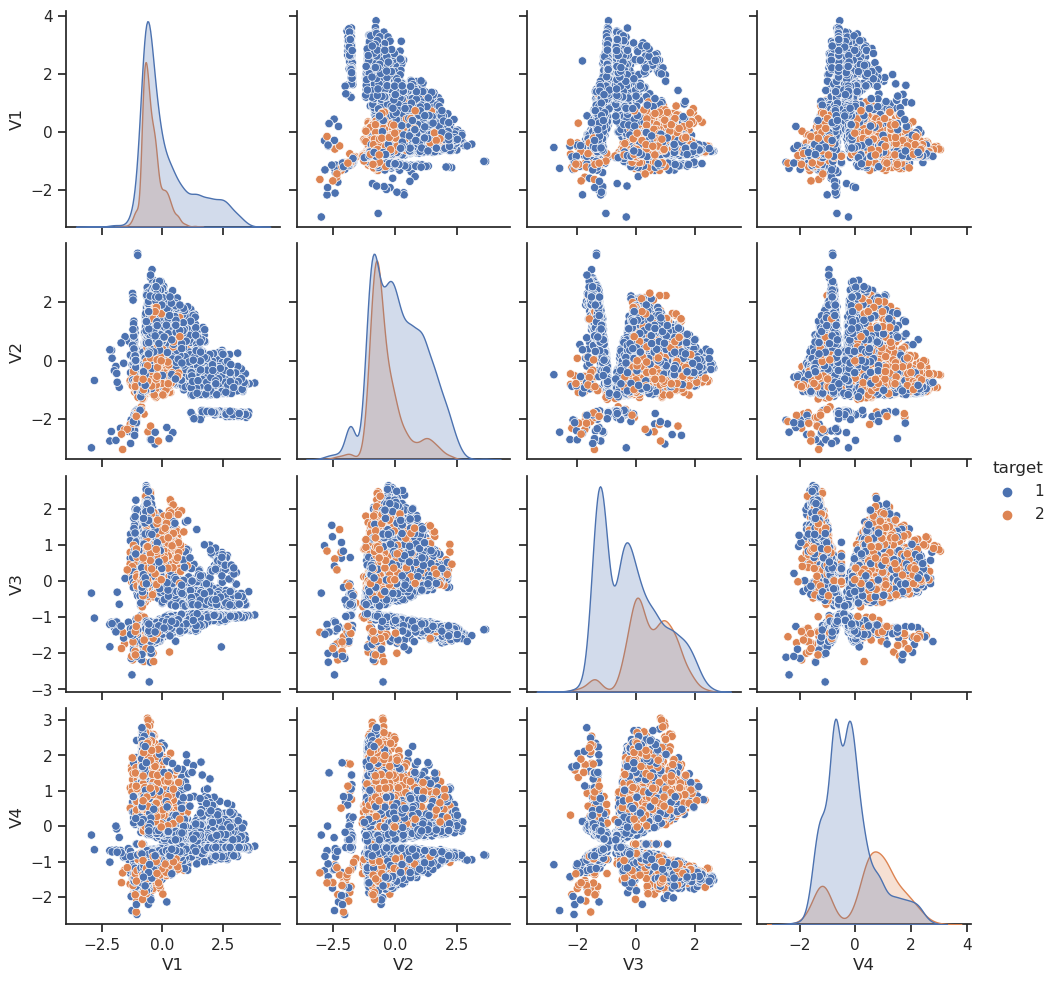

In [84]:
# YOUR CODE HERE
phoneme = sklearn.datasets.fetch_openml(name = "phoneme", version=1, parser='auto') 
X = phoneme.data
Y = phoneme.target

# Merge data and target. Copy X to D and assing 'target' D to Y
D = X.copy()
D['target'] = Y

# Check the first few rows of the data and their types
print(D.head())
print("\nData types:\n", D.dtypes)

# Visualize just a subset of features alongside the target to keep it computationally feasible
subset_features = D.columns[:4].tolist()  
subset_features.append('target')

# Create a pairplot
fig = sns.pairplot(D[subset_features], hue='target')


In [ ]:
if 'fig' not in globals():
    print("fig is not defined, please store the pairplot as fig")
else:
    print("This can work")


### Test of normality

Test if the variables are normally distributed in each target class using normality test. Place the p-values of the normality test in array or list called `pn`.

The target variable is NOT normally distributed.


/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


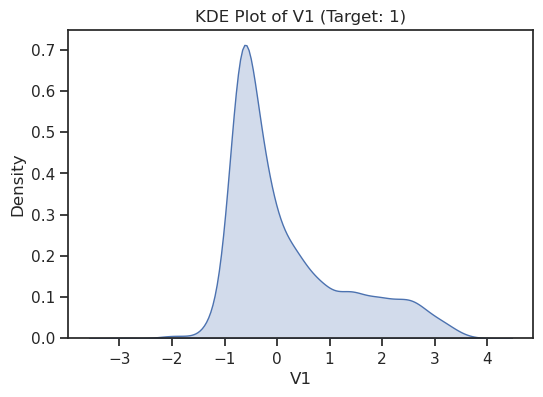

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


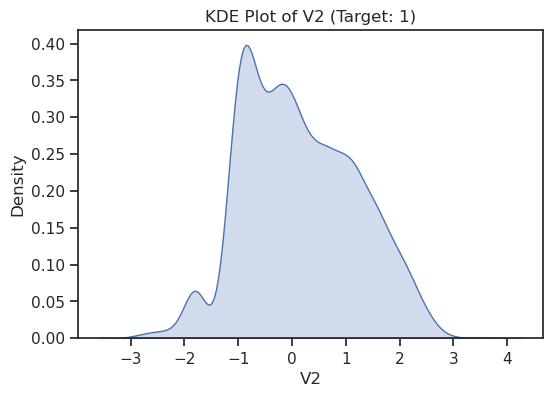

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


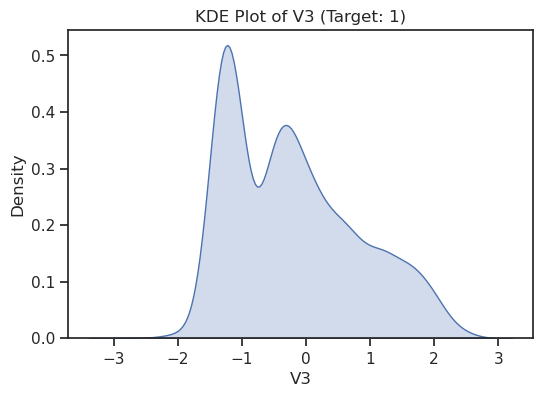

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


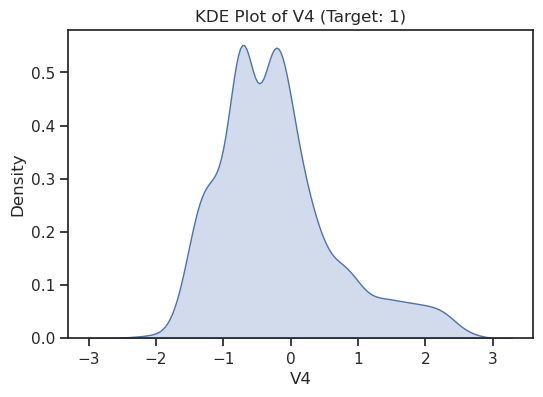

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


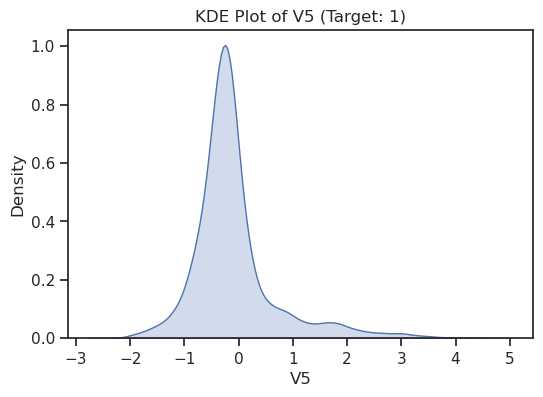

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


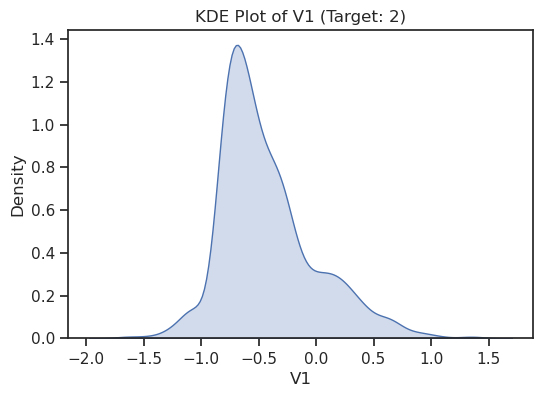

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


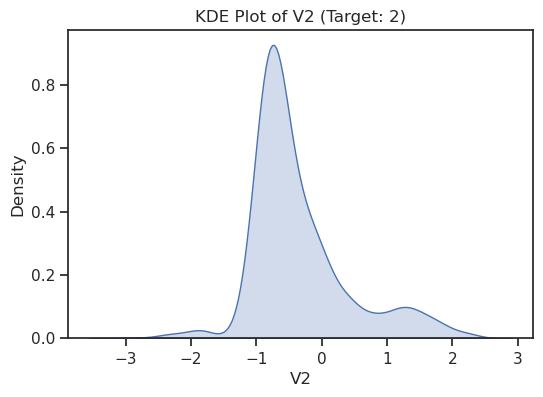

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


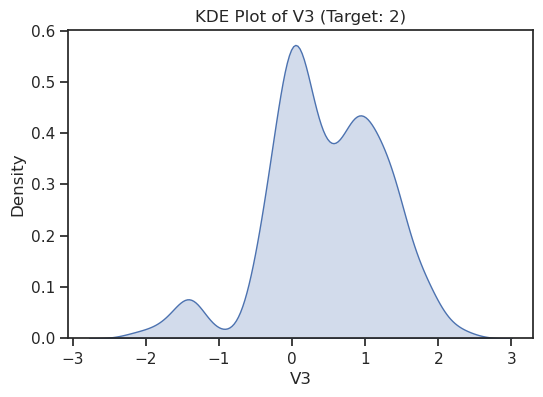

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


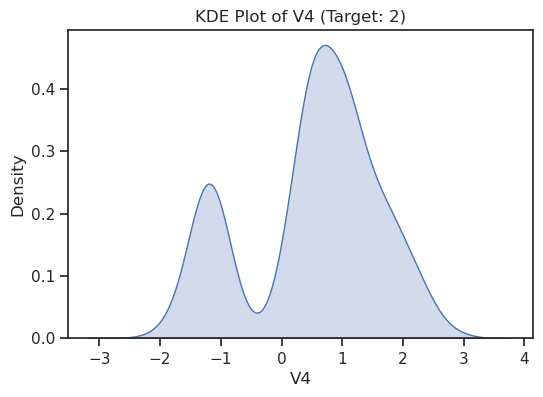

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


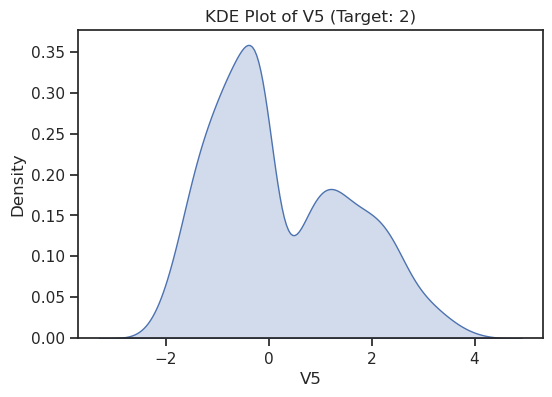

In [146]:
from scipy.stats import normaltest, probplot
from scipy.stats import ttest_ind 
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
import pylab as p  
# YOUR CODE HERE
phoneme = sklearn.datasets.fetch_openml(name = "phoneme", version=1, parser='auto') 

X = phoneme.data
Y = phoneme.target

# Merge data and target. Copy X to D and assing 'target' D to Y
D = X.copy()
D['target'] = Y

# List to store p-values
pn = []

# Check if target is normally distributed
_, pvalue_target = normaltest(Y.astype(np.float64))
alpha = 0.05
if pvalue_target < alpha:
    print("The target variable is NOT normally distributed.")
else:
    print("The target variable is normally distributed.")

# Loop through each unique target class
for target_class in D['target'].unique():
    # Extract subset of data for the current target class
    subset = D[D['target'] == target_class].drop(columns='target')
    
    # Loop through each feature
    for feature in subset.columns:
        # Perform a normality test and store the p-value
        _, p_value = normaltest(subset[feature])
        pn.append(p_value)

        # Lets make Kernel Density Estimate plot to visalize
        plt.figure(figsize=(6, 4))
        sns.kdeplot(subset[feature], fill=True)
        plt.title(f'KDE Plot of {feature} (Target: {target_class})')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.show()

In [ ]:
if 'pn' not in globals():
    print("pn is not defined, please store the p-values as pn")
if len(pn)<5:
    print("There seems not be be all p-values included in pn")
else:
    print("This can work")



### Test of mean

Use suitable test to see if the means of each feature are significantly different in different targets. Store the P-value of the test for each variable as array or list `pm`.

/opt/tljh/user/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/pytho

Comparing means for feature 'V1':
  Significant difference found (p-value = 0.00000).


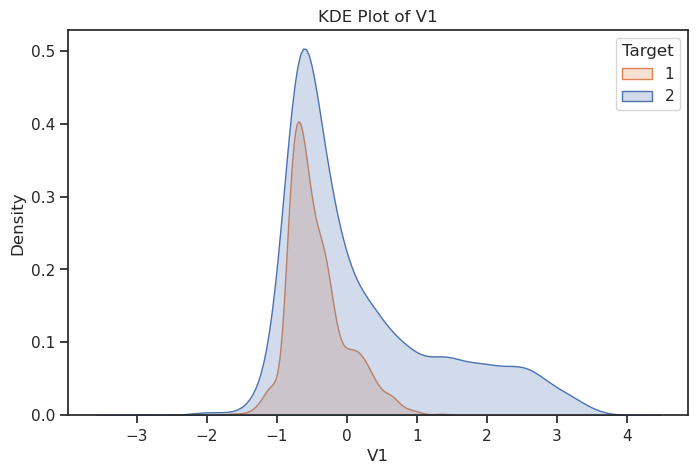

Comparing means for feature 'V2':
  Significant difference found (p-value = 0.00000).


/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

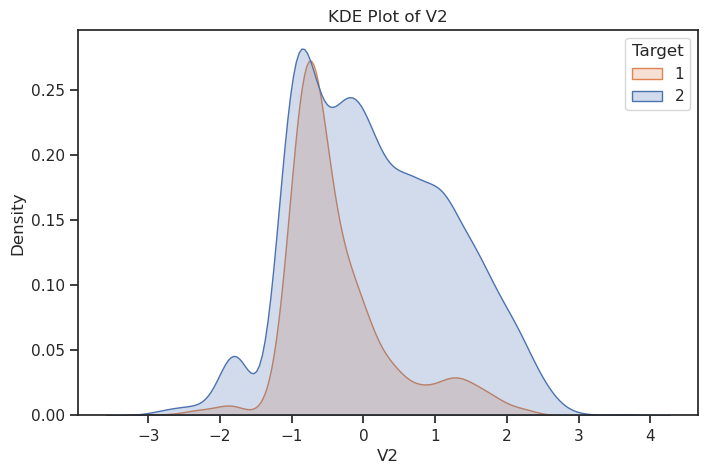

Comparing means for feature 'V3':
  Significant difference found (p-value = 0.00000).


/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

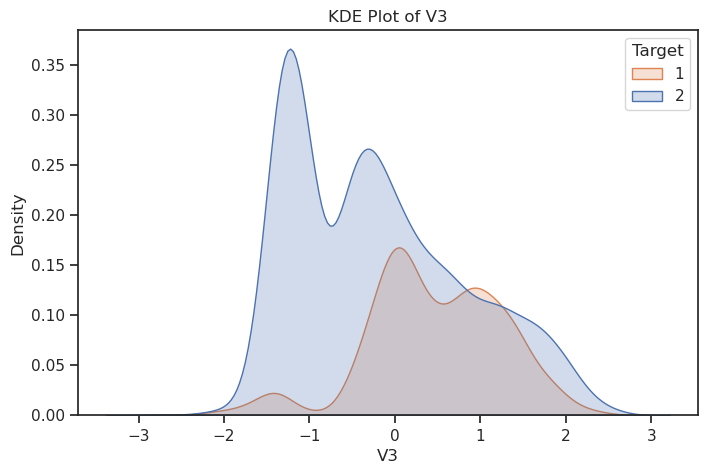

Comparing means for feature 'V4':
  Significant difference found (p-value = 0.00000).


/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

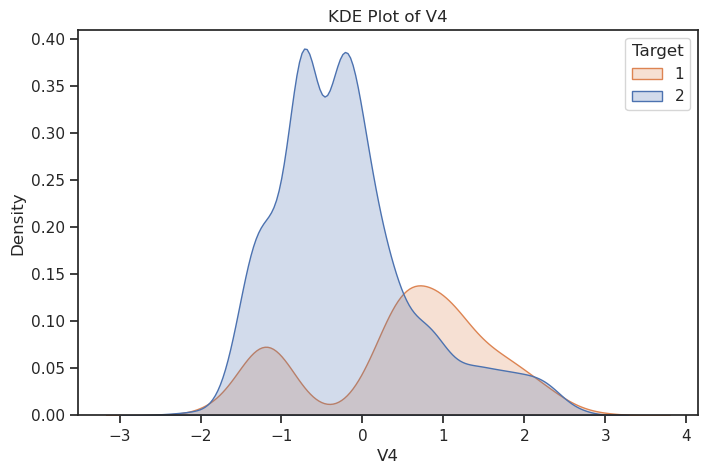

Comparing means for feature 'V5':
  Significant difference found (p-value = 0.00000).


/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain c

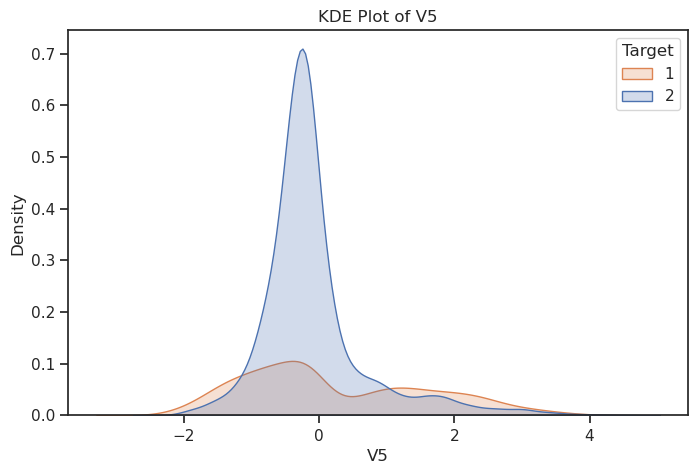

In [147]:

# YOUR CODE HERE
phoneme = sklearn.datasets.fetch_openml(name="phoneme", version=1, as_frame=True)

# Extract feature matrix (X) and the target (Y)
X = phoneme.data
Y = phoneme.target

# Merge data and target
D = X.copy()
D['target'] = Y

# Assuming binary classification for simplicity in using T-Test.
# If you have more than two classes, consider ANOVA or Kruskal-Wallis.
unique_classes = D['target'].unique()
if len(unique_classes) != 2:
    raise ValueError("The script is currently suited for binary classification problems.")

# Separate data into two subsets based on the target classes
subset1 = D[D['target'] == unique_classes[0]].drop(columns='target')
subset2 = D[D['target'] == unique_classes[1]].drop(columns='target')

# Loop through each feature
for feature in subset1.columns:
    # Perform a T-Test
    t_stat, p_value = ttest_ind(subset1[feature], subset2[feature])

    # Report
    print(f"Comparing means for feature '{feature}':")
    if p_value < 0.05:
        print(f"  Significant difference found (p-value = {p_value:.5f}).")
    else:
        print(f"  No significant difference found (p-value = {p_value:.5f}).")

    # KDE plot for visualization
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=D, x=feature, hue='target', fill=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Target', labels=unique_classes)
    plt.show()

In [ ]:
if 'pm' not in globals():
    print("pm is not defined, please store the p-values as pm")
if len(pn)<5:
    print("There seems not be be all p-values included in pm")
else:
    print("This can work")



### The result
Are the means significantly different or not?

YOUR ANSWER HERE